# EMC^2 demo notebook

In this notebook we show an example of how to run EMC2 using ModelE and HSRL data

In [1]:
import emc2
import act
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we load the model data using the ModelE object

In [2]:
model_path = 'allvars.SCM_AWR_linft_BT0_unNa_noaer.nc'
my_model = emc2.core.model.ModelE(model_path)

After that, we load in the KAZR data using the KAZR object.

In [3]:
KAZR = emc2.core.instruments.KAZR('nsa')
KAZR.read_arm_netcdf_file('awrkazrcorgeM1.c0.20160816.000001.nc')

In [4]:
KAZR.ds

<xarray.Dataset>
Dimensions:                                   (range: 600, time: 43262)
Coordinates:
  * time                                      (time) datetime64[ns] 2016-08-16T00:00:01.172000 ... 2016-08-16T23:59:58.015000
  * range                                     (range) float32 100.679245 ... 18058.242
Data variables:
    base_time                                 datetime64[ns] 2016-08-16
    time_offset                               (time) datetime64[ns] 2016-08-16T00:00:01.172000 ... 2016-08-16T23:59:58.015000
    reflectivity_copol                        (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_reflectivity_copol                     (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    gaseous_attenuation_correction_copol      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_gaseous_attenuation_correction_copol   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    mean_doppler_velocity_copol               (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_mean_doppler_velocity_copol            (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    spectral_width_copol                      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_spectral_width_copol                   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    signal_to_noise_ratio_copol               (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    significant_detection_mask                (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    mean_doppler_velocity_copol_dealias_flag  (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    rx_noise                                  (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    sky_noise_copol                           (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    cold_noise_copol                          (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    hot_noise_copol                           (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    temp                                      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_temp                                   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    rh                                        (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_rh                                     (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    bar_pres                                  (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_bar_pres                               (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    lat                                       float32 ...
    lon                                       float32 ...
    alt                                       float32 ...
Attributes:
    command_line:                idl -R -n kazrcorc0 -s awr -f M1 -b 20160816...
    Conventions:                 ARM-1.2
    process_version:             vap-kazrcor-5.0.0-devel
    input_datastreams:           awrkazrgeM1.a1 : 2.8 : 20160816.000001\nawrk...
    dod_version:                 kazrcorge-c0-1.5
    site_id:                     awr
    platform_id:                 kazrcorge
    facility_id:                 M1
    data_level:                  c0
    location_description:        ARM West Antarctic Radiation Experiment (AWA...
    datastream:                  awrkazrcorgeM1.c0
    antenna_altitude:            3.66 m
    antenna_diameter:            1.81 m
    attenuation_short_pulse:     4.000000 dB
    clutter_filter_len:          0
    fft_len:                     512
    num_spectral_averages:      

The following command will generate 8 subcolumns per time period of simulated KAZR data.

In [ ]:
my_model = emc2.simulator.main.make_simulated_data(my_model, KAZR, 8)

In [6]:
my_model.ds

<xarray.Dataset>
Dimensions:                    (plm: 63, subcolumn: 8, time: 240)
Coordinates:
  * plm                        (plm) float64 995.0 985.0 975.0 ... 0.247 0.139
  * time                       (time) datetime64[ns] 2016-08-16T01:15:00 ... 2016-08-21T00:45:00
  * subcolumn                  (subcolumn) int64 0 1 2 3 4 5 6 7
    lat                        float32 -77.85
    lon                        float32 166.72
Data variables:
    QCImc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QCLmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QPImc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QPLmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    axyp                       float32 dask.array<chunksize=(), meta=np.ndarray>
    cIWPss                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cLWPss                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmc_2d                   (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldmcci                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmccl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmcpi                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmcpl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldss                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldss_2d                   (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldssci                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsscl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsspi                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsspl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldtot_2d                  (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    dq_ls                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_mc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_nudge                   (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_ss                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_turb                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_ls                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_lw                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_mc                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_nudge                  (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_rad                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_ss                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_sw                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_turb                   (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    e_turb                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    gtempr                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    isccp_tau                  (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    iwp                       

EMC^2 interacts with the [Atmospheric Community Toolkit](https://arm-doe.github.io/ACT) for easy to create visualizations. You can use the TimeSeriesDisplay object to make visualizations of both the observation and simulated radar parameters.

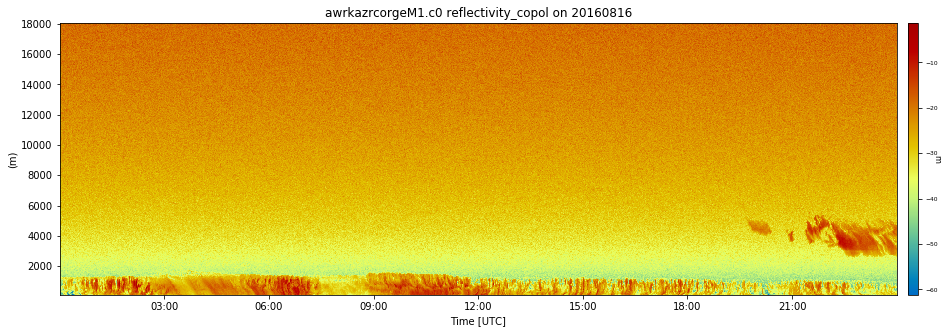

In [16]:
display = act.plotting.TimeSeriesDisplay(KAZR.ds, figsize=(15,5))
display.plot('reflectivity_copol', cmap='act_HomeyerRainbow', subplot_index=(0, ))

In [18]:
display.fig.savefig('Kazr_refl.png', dpi=300)

C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\act\plotting\plot.py:84: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  "name of act_datastream!"), UserWarning)


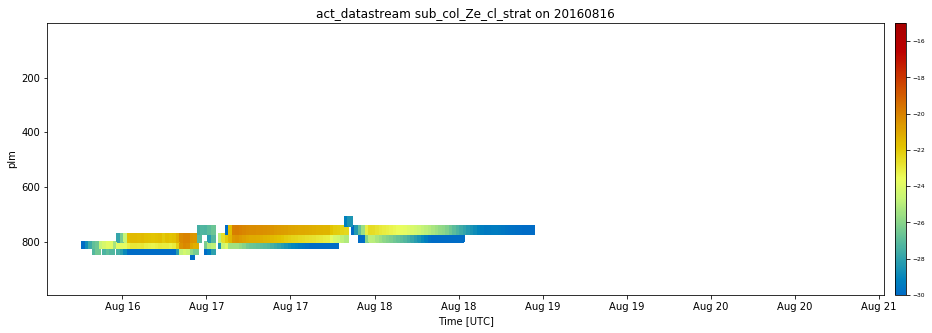

In [14]:
model_display = act.plotting.TimeSeriesDisplay(my_model.ds.sel(subcolumn=0), figsize=(15,5))
model_display.plot('sub_col_Ze_cl_strat', cmap='act_HomeyerRainbow', vmin=-30, vmax=-15)
model_display.axes[0].invert_yaxis()
model_display.fig.savefig('model_Ze.png', dpi=150)